In [1]:
import pandas as pd

df = pd.read_excel('./test_test.xlsx')
df.head()

,탑승 일시,탑승 시간,교통수단,사용처,사용금액,사용후잔액,승차역,하차역,하차일시,하차 시간,노선(호선),차량번호
0,2023-06-02,07:50:26,버스,(주)서울승합,300원,"14,450원",신논현역.구교보타워사거리,영동시장,2023-06-02,07:56:10,3412번(강동공영차고지~강남역),서울74사5439
1,2023-06-02,06:43:19,버스,경남여객(노선입찰제),"2,800원","14,750원",동원로얄듀크.용인등기소,신논현역.주류성빌딩,2023-06-02,07:40:21,경기버스노선,NaN
2,2023-06-01,08:04:14,버스,경기상운(노선입찰제),400원,"20,650원",지하철2호선.강남역(중),학동역6번출구,2023-06-01,08:17:42,경기버스노선,NaN
3,2023-06-01,06:51:20,버스,경남여객(노선입찰제),"2,800원","21,050원",동원로얄듀크.용인등기소,신논현역.주류성빌딩,2023-06-01,07:59:02,경기버스노선,NaN
4,2023-05-31,07:56:26,버스,(주)서울승합,400원,"27,550원",신논현역.구교보타워사거리,학동역5번출구,2023-05-31,08:03:11,3412번(강동공영차고지~강남역),서울74사4220


# 1. ‘교통수단’, ‘사용처’, ‘사용후잔액’,   ‘하차 일시’,‘차량번호’열 없애기

In [2]:
columns_to_exclude = ['교통수단', '사용처', '사용후잔액', '하차일시', '차량번호']
df = df.drop(columns=columns_to_exclude, axis=1)
df.head()

,탑승 일시,탑승 시간,사용금액,승차역,하차역,하차 시간,노선(호선)
0,2023-06-02,07:50:26,300원,신논현역.구교보타워사거리,영동시장,07:56:10,3412번(강동공영차고지~강남역)
1,2023-06-02,06:43:19,"2,800원",동원로얄듀크.용인등기소,신논현역.주류성빌딩,07:40:21,경기버스노선
2,2023-06-01,08:04:14,400원,지하철2호선.강남역(중),학동역6번출구,08:17:42,경기버스노선
3,2023-06-01,06:51:20,"2,800원",동원로얄듀크.용인등기소,신논현역.주류성빌딩,07:59:02,경기버스노선
4,2023-05-31,07:56:26,400원,신논현역.구교보타워사거리,학동역5번출구,08:03:11,3412번(강동공영차고지~강남역)


# 2. 요일 열 추가하기

In [3]:
# 탑승 일시 열을 datetime 형식으로 변환
df['탑승 일시'] = pd.to_datetime(df['탑승 일시'])

# '요일' 열 추가 (한국어로 표시)
df['요일'] = df['탑승 일시'].dt.strftime('%A')

# 한국어 요일명으로 변경
weekday_dict = {
    'Monday': '월',
    'Tuesday': '화',
    'Wednesday': '수',
    'Thursday': '목',
    'Friday': '금',
    'Saturday': '토',
    'Sunday': '일'
}

df['요일'] = df['요일'].map(weekday_dict)

df.head()

,탑승 일시,탑승 시간,사용금액,승차역,하차역,하차 시간,노선(호선),요일
0,2023-06-02,07:50:26,300원,신논현역.구교보타워사거리,영동시장,07:56:10,3412번(강동공영차고지~강남역),금
1,2023-06-02,06:43:19,"2,800원",동원로얄듀크.용인등기소,신논현역.주류성빌딩,07:40:21,경기버스노선,금
2,2023-06-01,08:04:14,400원,지하철2호선.강남역(중),학동역6번출구,08:17:42,경기버스노선,목
3,2023-06-01,06:51:20,"2,800원",동원로얄듀크.용인등기소,신논현역.주류성빌딩,07:59:02,경기버스노선,목
4,2023-05-31,07:56:26,400원,신논현역.구교보타워사거리,학동역5번출구,08:03:11,3412번(강동공영차고지~강남역),수


# 3. 하차 시간 - 탑승 시간 = 이동 시간 열 추가

In [4]:
from datetime import datetime

df['탑승 시간'] = pd.to_datetime(df['탑승 시간'])
df['하차 시간'] = pd.to_datetime(df['하차 시간'])


df['이동 시간'] = df['하차 시간'] - df['탑승 시간']
df.head()

C:\Users\korea\AppData\Local\Temp\ipykernel_15264\416356168.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['탑승 시간'] = pd.to_datetime(df['탑승 시간'])
C:\Users\korea\AppData\Local\Temp\ipykernel_15264\416356168.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['하차 시간'] = pd.to_datetime(df['하차 시간'])


,탑승 일시,탑승 시간,사용금액,승차역,하차역,하차 시간,노선(호선),요일,이동 시간
0,2023-06-02,2023-06-06 07:50:26,300원,신논현역.구교보타워사거리,영동시장,2023-06-06 07:56:10,3412번(강동공영차고지~강남역),금,0 days 00:05:44
1,2023-06-02,2023-06-06 06:43:19,"2,800원",동원로얄듀크.용인등기소,신논현역.주류성빌딩,2023-06-06 07:40:21,경기버스노선,금,0 days 00:57:02
2,2023-06-01,2023-06-06 08:04:14,400원,지하철2호선.강남역(중),학동역6번출구,2023-06-06 08:17:42,경기버스노선,목,0 days 00:13:28
3,2023-06-01,2023-06-06 06:51:20,"2,800원",동원로얄듀크.용인등기소,신논현역.주류성빌딩,2023-06-06 07:59:02,경기버스노선,목,0 days 01:07:42
4,2023-05-31,2023-06-06 07:56:26,400원,신논현역.구교보타워사거리,학동역5번출구,2023-06-06 08:03:11,3412번(강동공영차고지~강남역),수,0 days 00:06:45


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype          
---  ------  --------------  -----          
 0   탑승 일시   60 non-null     datetime64[ns] 
 1   탑승 시간   60 non-null     datetime64[ns] 
 2   사용금액    60 non-null     object         
 3   승차역     60 non-null     object         
 4   하차역     60 non-null     object         
 5   하차 시간   60 non-null     datetime64[ns] 
 6   노선(호선)  60 non-null     object         
 7   요일      60 non-null     object         
 8   이동 시간   60 non-null     timedelta64[ns]
dtypes: datetime64[ns](3), object(5), timedelta64[ns](1)
memory usage: 4.3+ KB


In [6]:
df['이동 시간'] = df['이동 시간'].apply(lambda x: str(x).split(' ')[-1])
df.head()

,탑승 일시,탑승 시간,사용금액,승차역,하차역,하차 시간,노선(호선),요일,이동 시간
0,2023-06-02,2023-06-06 07:50:26,300원,신논현역.구교보타워사거리,영동시장,2023-06-06 07:56:10,3412번(강동공영차고지~강남역),금,00:05:44
1,2023-06-02,2023-06-06 06:43:19,"2,800원",동원로얄듀크.용인등기소,신논현역.주류성빌딩,2023-06-06 07:40:21,경기버스노선,금,00:57:02
2,2023-06-01,2023-06-06 08:04:14,400원,지하철2호선.강남역(중),학동역6번출구,2023-06-06 08:17:42,경기버스노선,목,00:13:28
3,2023-06-01,2023-06-06 06:51:20,"2,800원",동원로얄듀크.용인등기소,신논현역.주류성빌딩,2023-06-06 07:59:02,경기버스노선,목,01:07:42
4,2023-05-31,2023-06-06 07:56:26,400원,신논현역.구교보타워사거리,학동역5번출구,2023-06-06 08:03:11,3412번(강동공영차고지~강남역),수,00:06:45


탑승 일시   요일    탑승 시간   하차 시간   이동 시간   노선(호선)  승차역  하차역  사용금액  
순으로 정렬

In [7]:
new_order = ['탑승 일시', '요일', '탑승 시간', '하차 시간', '이동 시간', '노선(호선)', '승차역', '하차역', '사용금액']
df = df.reindex(columns=new_order)

df.head()

,탑승 일시,요일,탑승 시간,하차 시간,이동 시간,노선(호선),승차역,하차역,사용금액
0,2023-06-02,금,2023-06-06 07:50:26,2023-06-06 07:56:10,00:05:44,3412번(강동공영차고지~강남역),신논현역.구교보타워사거리,영동시장,300원
1,2023-06-02,금,2023-06-06 06:43:19,2023-06-06 07:40:21,00:57:02,경기버스노선,동원로얄듀크.용인등기소,신논현역.주류성빌딩,"2,800원"
2,2023-06-01,목,2023-06-06 08:04:14,2023-06-06 08:17:42,00:13:28,경기버스노선,지하철2호선.강남역(중),학동역6번출구,400원
3,2023-06-01,목,2023-06-06 06:51:20,2023-06-06 07:59:02,01:07:42,경기버스노선,동원로얄듀크.용인등기소,신논현역.주류성빌딩,"2,800원"
4,2023-05-31,수,2023-06-06 07:56:26,2023-06-06 08:03:11,00:06:45,3412번(강동공영차고지~강남역),신논현역.구교보타워사거리,학동역5번출구,400원


# 4. 1차 교통, 2차 교통 구분

In [8]:
# '사용금액' 열의 숫자 부분 추출 및 정수형 변환
df['사용금액'] = df['사용금액'].str.replace(',', '').str.extract('(\d+)').astype(int)

# '1차 교통'과 '2차 교통'으로 분류
df['교통수단'] = df['사용금액'].apply(lambda x: '1차 교통' if x >= 2000 else '2차 교통')

df.head()

,탑승 일시,요일,탑승 시간,하차 시간,이동 시간,노선(호선),승차역,하차역,사용금액,교통수단
0,2023-06-02,금,2023-06-06 07:50:26,2023-06-06 07:56:10,00:05:44,3412번(강동공영차고지~강남역),신논현역.구교보타워사거리,영동시장,300,2차 교통
1,2023-06-02,금,2023-06-06 06:43:19,2023-06-06 07:40:21,00:57:02,경기버스노선,동원로얄듀크.용인등기소,신논현역.주류성빌딩,2800,1차 교통
2,2023-06-01,목,2023-06-06 08:04:14,2023-06-06 08:17:42,00:13:28,경기버스노선,지하철2호선.강남역(중),학동역6번출구,400,2차 교통
3,2023-06-01,목,2023-06-06 06:51:20,2023-06-06 07:59:02,01:07:42,경기버스노선,동원로얄듀크.용인등기소,신논현역.주류성빌딩,2800,1차 교통
4,2023-05-31,수,2023-06-06 07:56:26,2023-06-06 08:03:11,00:06:45,3412번(강동공영차고지~강남역),신논현역.구교보타워사거리,학동역5번출구,400,2차 교통


# 5. 2차 교통에서 9202번 버스와 3412 구분해서 비교

In [9]:
# '버스번호' 값 변경
df.loc[(df['교통수단'] == '2차 교통') & (df['노선(호선)'].str.contains('3412', na=False)), '버스번호'] = '3412'
df.loc[(df['교통수단'] == '2차 교통') & (~df['노선(호선)'].str.contains('3412', na=False)), '버스번호'] = '9202'
df['버스번호'].fillna('0', inplace=True)  # 빈 값인 경우 0으로 채우기

df.head()

,탑승 일시,요일,탑승 시간,하차 시간,이동 시간,노선(호선),승차역,하차역,사용금액,교통수단,버스번호
0,2023-06-02,금,2023-06-06 07:50:26,2023-06-06 07:56:10,00:05:44,3412번(강동공영차고지~강남역),신논현역.구교보타워사거리,영동시장,300,2차 교통,3412
1,2023-06-02,금,2023-06-06 06:43:19,2023-06-06 07:40:21,00:57:02,경기버스노선,동원로얄듀크.용인등기소,신논현역.주류성빌딩,2800,1차 교통,0
2,2023-06-01,목,2023-06-06 08:04:14,2023-06-06 08:17:42,00:13:28,경기버스노선,지하철2호선.강남역(중),학동역6번출구,400,2차 교통,9202
3,2023-06-01,목,2023-06-06 06:51:20,2023-06-06 07:59:02,01:07:42,경기버스노선,동원로얄듀크.용인등기소,신논현역.주류성빌딩,2800,1차 교통,0
4,2023-05-31,수,2023-06-06 07:56:26,2023-06-06 08:03:11,00:06:45,3412번(강동공영차고지~강남역),신논현역.구교보타워사거리,학동역5번출구,400,2차 교통,3412


# 6. 1차 교통에서 5001번 버스와 5001-1 버스 구분하기

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   탑승 일시   60 non-null     datetime64[ns]
 1   요일      60 non-null     object        
 2   탑승 시간   60 non-null     datetime64[ns]
 3   하차 시간   60 non-null     datetime64[ns]
 4   이동 시간   60 non-null     object        
 5   노선(호선)  60 non-null     object        
 6   승차역     60 non-null     object        
 7   하차역     60 non-null     object        
 8   사용금액    60 non-null     int32         
 9   교통수단    60 non-null     object        
 10  버스번호    60 non-null     object        
dtypes: datetime64[ns](3), int32(1), object(7)
memory usage: 5.0+ KB


In [11]:
from sklearn.cluster import KMeans

# '이동시간' 열을 시간(분)으로 변환
df['이동시간(분)'] = df['이동 시간'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

# '버스번호' 값 변경 및 비지도 학습을 위한 클러스터링
df.loc[df['교통수단'] == '1차 교통', '버스번호'] = '5001'
X = df[df['교통수단'] == '1차 교통'][['이동시간(분)']]
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = kmeans.labels_
df.loc[df['교통수단'] == '1차 교통', '버스번호'] = ['5001' if label == 0 else '5001-1' for label in labels]

df = df.drop('이동시간(분)', axis=1)

df.head()

C:\Users\korea\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,탑승 일시,요일,탑승 시간,하차 시간,이동 시간,노선(호선),승차역,하차역,사용금액,교통수단,버스번호
0,2023-06-02,금,2023-06-06 07:50:26,2023-06-06 07:56:10,00:05:44,3412번(강동공영차고지~강남역),신논현역.구교보타워사거리,영동시장,300,2차 교통,3412
1,2023-06-02,금,2023-06-06 06:43:19,2023-06-06 07:40:21,00:57:02,경기버스노선,동원로얄듀크.용인등기소,신논현역.주류성빌딩,2800,1차 교통,5001
2,2023-06-01,목,2023-06-06 08:04:14,2023-06-06 08:17:42,00:13:28,경기버스노선,지하철2호선.강남역(중),학동역6번출구,400,2차 교통,9202
3,2023-06-01,목,2023-06-06 06:51:20,2023-06-06 07:59:02,01:07:42,경기버스노선,동원로얄듀크.용인등기소,신논현역.주류성빌딩,2800,1차 교통,5001-1
4,2023-05-31,수,2023-06-06 07:56:26,2023-06-06 08:03:11,00:06:45,3412번(강동공영차고지~강남역),신논현역.구교보타워사거리,학동역5번출구,400,2차 교통,3412


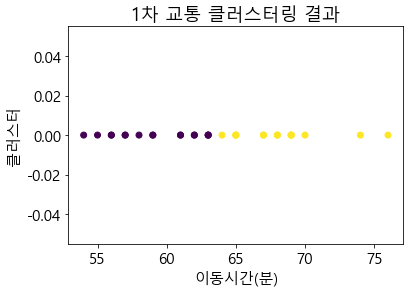

In [12]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15 # 글자크기

# 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결
matplotlib.rcParams['axes.unicode_minus']=False

# 시각화
plt.scatter(X, [0] * len(X), c=labels)
plt.xlabel('이동시간(분)')
plt.ylabel('클러스터')
plt.title('1차 교통 클러스터링 결과')
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   탑승 일시   60 non-null     datetime64[ns]
 1   요일      60 non-null     object        
 2   탑승 시간   60 non-null     datetime64[ns]
 3   하차 시간   60 non-null     datetime64[ns]
 4   이동 시간   60 non-null     object        
 5   노선(호선)  60 non-null     object        
 6   승차역     60 non-null     object        
 7   하차역     60 non-null     object        
 8   사용금액    60 non-null     int32         
 9   교통수단    60 non-null     object        
 10  버스번호    60 non-null     object        
dtypes: datetime64[ns](3), int32(1), object(7)
memory usage: 5.0+ KB


# 9. 그래프로 요일별 이동 시간 그리기

In [14]:
# '탑승 일시'를 날짜 형식으로 변환
df['탑승 일시'] = pd.to_datetime(df['탑승 일시']).dt.date

# '탑승 일시'를 기준으로 데이터프레임 그룹화
grouped_df = df.groupby('탑승 일시')

# '요일'은 '탑승 일시'를 기준으로 그룹화
weekday_df = grouped_df['요일'].first().reset_index()

# '탑승시간'은 '교통수단'열에서 값이 '1차교통'인 경우 그룹화
boarding_time_df = grouped_df.apply(lambda x: x[x['교통수단'] == '1차 교통']['탑승 시간'].mean()).reset_index()
boarding_time_df.columns = ['탑승 일시', '탑승 시간']

# '하차 시간'은 '교통수단'열에서 값이 '2차 교통'인 경우 그룹화
alighting_time_df = grouped_df.apply(lambda x: x[x['교통수단'] == '2차 교통']['하차 시간'].mean()).reset_index()
alighting_time_df.columns = ['탑승 일시', '하차 시간']

# '사용금액'은 '탑승 일시'를 기준으로 합계 계산
usage_amount_df = grouped_df['사용금액'].sum().reset_index()

# 데이터베이스 생성을 위해 모든 데이터프레임을 병합
new_df = weekday_df.merge(boarding_time_df, on='탑승 일시').merge(alighting_time_df, on='탑승 일시').merge(usage_amount_df, on='탑승 일시')

new_df

,탑승 일시,요일,탑승 시간,하차 시간,사용금액
0,2023-04-19,수,2023-06-06 06:54:56,2023-06-06 08:20:23,3100
1,2023-04-20,목,2023-06-06 06:45:55,2023-06-06 08:15:44,3100
2,2023-04-21,금,2023-06-06 06:42:53,2023-06-06 08:07:16,3100
3,2023-04-24,월,2023-06-06 06:49:41,2023-06-06 08:17:40,3100
4,2023-04-25,화,2023-06-06 06:43:00,2023-06-06 08:12:31,3100
5,2023-04-26,수,2023-06-06 06:39:05,2023-06-06 08:02:05,3200
6,2023-04-27,목,2023-06-06 06:54:06,2023-06-06 08:22:56,3200
7,2023-04-28,금,2023-06-06 06:42:44,2023-06-06 08:04:29,3100
8,2023-05-02,화,2023-06-06 06:42:16,2023-06-06 08:17:39,3200
9,2023-05-03,수,2023-06-06 06:39:06,2023-06-06 08:16:05,3200


In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   탑승 일시   30 non-null     object        
 1   요일      30 non-null     object        
 2   탑승 시간   30 non-null     datetime64[ns]
 3   하차 시간   30 non-null     datetime64[ns]
 4   사용금액    30 non-null     int32         
dtypes: datetime64[ns](2), int32(1), object(2)
memory usage: 1.2+ KB


In [16]:
new_df['탑승 시간'] = new_df['탑승 시간'].dt.strftime('%H:%M:%S')
new_df['하차 시간'] = new_df['하차 시간'].dt.strftime('%H:%M:%S')

new_df.head()

,탑승 일시,요일,탑승 시간,하차 시간,사용금액
0,2023-04-19,수,06:54:56,08:20:23,3100
1,2023-04-20,목,06:45:55,08:15:44,3100
2,2023-04-21,금,06:42:53,08:07:16,3100
3,2023-04-24,월,06:49:41,08:17:40,3100
4,2023-04-25,화,06:43:00,08:12:31,3100


In [17]:
# '이동 시간' 열의 데이터 타입을 datetime으로 변환
df['이동 시간'] = pd.to_datetime(df['이동 시간'], format='%H:%M:%S')

In [18]:
# '이동 시간' 열의 데이터 타입을 datetime으로 변환
df['이동 시간'] = pd.to_datetime(df['이동 시간'], format='%H:%M:%S').dt.time

# '탑승 일시'를 기준으로 '이동 시간'을 합친 grouped_df 생성
grouped_df_new = df.groupby(pd.to_datetime(df['탑승 일시']).dt.date)['이동 시간'].apply(lambda x: pd.to_timedelta(x.astype(str)).sum()).reset_index()
grouped_df_new.columns = ['탑승 일시', '이동 시간']

# new_df와 grouped_df를 '탑승 일시'를 기준으로 조인하여 '이동 시간' 열 추가
new_df = pd.merge(new_df, grouped_df_new, on='탑승 일시', how='left')

In [19]:
new_df['이동 시간'] = pd.to_datetime(new_df['이동 시간'].dt.total_seconds(), unit='s').dt.strftime('%H:%M:%S')

new_df.head()

,탑승 일시,요일,탑승 시간,하차 시간,사용금액,이동 시간
0,2023-04-19,수,06:54:56,08:20:23,3100,01:19:30
1,2023-04-20,목,06:45:55,08:15:44,3100,01:13:39
2,2023-04-21,금,06:42:53,08:07:16,3100,01:07:52
3,2023-04-24,월,06:49:41,08:17:40,3100,01:14:45
4,2023-04-25,화,06:43:00,08:12:31,3100,01:21:52


In [20]:
new_df['이동 시간'].describe()

count           30
unique          29
top       01:19:30
freq             2
Name: 이동 시간, dtype: object

In [22]:
# '탑승 일시' 열의 데이터 타입을 datetime으로 변환
df['탑승 일시'] = pd.to_datetime(df['탑승 일시'])

# '요일'과 '이동 시간' 열로 그룹화하여 평균 계산
grouped_new_df = df.groupby('요일')['이동 시간'].mean()

# 인덱스 재설정 및 데이터프레임으로 변환
grouped_new_df = grouped_new_df.reset_index().to_frame()

# timedelta 값을 초 단위로 변환 (시간 단위로 나누기)
grouped_new_df['이동 시간'] = grouped_new_df['이동 시간'].apply(lambda x: x.total_seconds() / 3600)

# 그래프 그리기
plt.figure(figsize=(8, 5))
grouped_new_df.plot(x='요일', y='이동 시간', kind='bar', color='skyblue')
plt.xlabel('요일')
plt.ylabel('평균 이동 시간 (시간)')
plt.title('요일별 평균 이동 시간')
plt.xticks(rotation=0)
plt.show()

TypeError: unsupported operand type(s) for +: 'datetime.time' and 'datetime.time'